# Azure notebook for climate change data visualization

This notebook follows steps from here in the [Microsoft Docs/Learn](https://docs.microsoft.com/en-us/learn/modules/analyze-climate-data-with-azure-notebooks/2-upload-data-and-create-scatterplot?source=learn)

In [38]:
import matplotlib.pyplot as mp
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns; sns.set()

## Data import

In [39]:
yearsBase, meansBase = np.loadtxt('5-year-mean-1951-1980.csv', dtype='int,float', delimiter=',', usecols=(0,1), unpack=True)
years, means = np.loadtxt('5-year-mean-1882-2014.csv', dtype='int, float', delimiter=',', usecols=(0,1), unpack=True)

## Interpreting the data

There are two files in different window of times - 1951 to 1980 and another 1882 - 2014. Both files carry same infomration i.e. 

Year, Temperature difference

Each row in the file correspond to year and the temperature difference recorded for that year.

Temperature difference = base temperature - 5 year mean

base temperature = 30 year mean for the period e.g. 1951 to 1980


## Inspecting data as scatterplot chart

mp.scatter(yearsBase, meansBase)
mp.title('Scatter plot of mean temperature difference vs. year')
mp.xlabel('years', fontsize=12)
mp.ylabel('mean temperature difference', fontsize=12)
mp.show()

## Adding trendline to data

###  Demonstrate with <u>numpy library</u>

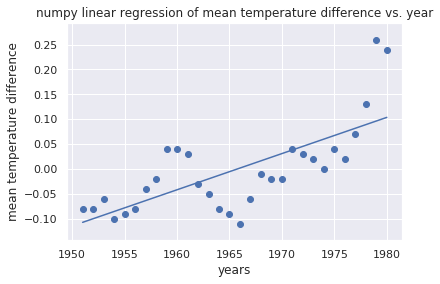

y = 0.007279199110122221 * x + -14.309265850945222


In [40]:
m,c = np.polyfit(yearsBase, meansBase, 1)

def trendline(x):
    return m*x + c

# Plot the scatter diagram along with trend built by _numpy_

mp.scatter(yearsBase, meansBase)
mp.plot(yearsBase, trendline(yearsBase))
mp.title('numpy linear regression of mean temperature difference vs. year')
mp.xlabel('years', fontsize=12)
mp.ylabel('mean temperature difference', fontsize=12)
mp.show()

print('y = {0} * x + {1}'.format(m,c))

### Demonstrate with <u>scikit-learn library</u>

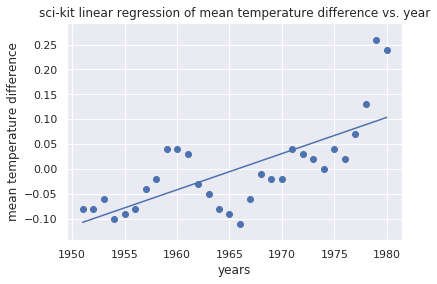

y = 0.007279199110122357 * x + -14.309265850945492


In [41]:
model = LinearRegression(fit_intercept=True)

model.fit(yearsBase[:, np.newaxis], meansBase)
mean_predicted = model.predict(yearsBase[:,np.newaxis])

# Plot the scatter chart along with trend built by _scikit-learn_

mp.scatter(yearsBase, meansBase)
mp.plot(yearsBase, mean_predicted)
mp.title('sci-kit linear regression of mean temperature difference vs. year')
mp.xlabel('years', fontsize=12)
mp.ylabel('mean temperature difference', fontsize=12)
mp.show()

print('y = {0} * x + {1}'.format(model.coef_[0],model.intercept_))

### Interpretation

It is important in Data Science that we interpret data as we continue to build model. Failing to do so will yield a concotion of graph and equation which does not carry much value for the stakeholders.

As you would have noticed trend line is nothing but a first order polynomial i.e. a line derived by performing the linear regression on data points. We used two different libraries in python to do the regression 

* numpy
* sci-kit

Both the libraries yielded the same output. Similarity of the output is determined by the coefficients of the model i.e. `m` and `c` which are slope of the line and the y-intercept at x=0 for the line.


Based on the values of the regression we can say the following observations - 

1. At the begining of timeline (i.e. Year - 0 in timeline) prediction says that temperatures would have been very colder. Since, difference between 30-year mean and 5-year mean is -14.31.

2. Rate of increase in temperature is increasing at rate of 0.007.

3. Large scale adoption of technology since has increased deviation to trendline (i.e. in year 1980 onwards). Tough there was a hump in 1960, decades to follow has seen stead increase with differences peaking in 1980.

### Demonstrate with <u>seaborn library</u>

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


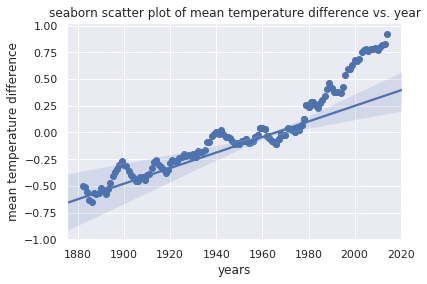

In [42]:
mp.scatter(years, means)
mp.title('seaborn scatter plot of mean temperature difference vs. year')
mp.xlabel('years', fontsize=12)
mp.ylabel('mean temperature difference', fontsize=12)
sns.regplot(yearsBase, meansBase)
mp.show()

### Narration on the interpretation

Seaborn is another library which has combined the linear regression code together. On the data this visualization confirms the earlier interpretation which we observed for the data beteen 1951-1980.

We additionally notice the trend line to actual data deviation has increased the following decades of 1980.